In [2]:
import os

os.chdir('/common/home/st1122/Projects/genMoPlan')

In [3]:
from genMoPlan.utils.roa import ROAEstimator


dataset = 'pendulum_lqr_50k'
model_path = '/common/home/st1122/Projects/genMoPlan/experiments/pendulum_lqr_50k/flow_matching/25_04_05-20_15_19_HILEN-1_HOLEN-31_HIPAD-F_HOPAD-T_STRD-1_data_lim_5000'

roa_estimator = ROAEstimator(
    dataset=dataset,
    model_path=model_path,
    n_runs=10,
)

roa_estimator.load_ground_truth()

[ utils/model ] Loading model from /common/home/st1122/Projects/genMoPlan/experiments/pendulum_lqr_50k/flow_matching/25_04_05-20_15_19_HILEN-1_HOLEN-31_HIPAD-F_HOPAD-T_STRD-1_data_lim_5000/best.pt
[ utils/config ] Imported genMoPlan.models.temporal:TemporalUnet
[ utils/config ] Imported genMoPlan.models.generative:FlowMatching
[ models/unet ] Channel dimensions: [(2, 32), (32, 64), (64, 128), (128, 256)], time_embed_dim: 32
[ scripts/estimate_roa ] Loading ground truth


/common/home/st1122/Projects/genMoPlan/genMoPlan/utils/json_args.py:76: UserWarning: 'JSONArgs' object has no attribute 'manifold'
  warnings.warn(f"'JSONArgs' object has no attribute '{key}'")


[ utils/roa ] Loaded 790653 ground truth data points


In [4]:
model = roa_estimator.model
model_args = roa_estimator.model_args
start_points = roa_estimator.start_points
start_points = start_points[1000]

In [7]:
from genMoPlan.utils.trajectory import generate_trajectories

trajs, final_states = generate_trajectories(
    model,
    model_args,
    start_points,
    max_path_length=502,
    verbose=True,
)

[ utils/trajectory ] Generating trajectories


100%|██████████| 501/501 [00:00<00:00, 633.02it/s]

[ utils/trajectory ] Processing trajectories


In [11]:
trajs.min(), trajs.max()

(np.float64(-0.9979013158981465), np.float64(0.09071833549137942))

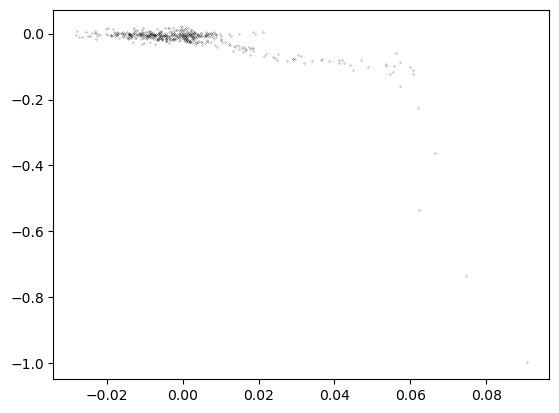

In [10]:
from genMoPlan.utils.trajectory import plot_trajectories

plt = plot_trajectories(trajs[None, ], image_path=None, verbose=False, comparison_trajectories=None, show_traj_ends=False, return_plot=True)